In [ ]:
'''
1.Explore the dataset
1.1Kmeans
1.2PCA

2.Build DNN(Deep Neural Networks)
Use Tensorflow to build two-layer CNN
'''

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from scipy.cluster.vq import *

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial.distance import cdist


#Load dataset and create a dataframe
data_imgs = np.loadtxt('imgs-train.txt', delimiter = ' ')
data_label = np.loadtxt('label-train.txt')
data_label = data_label[:,1]
data_imgs = data_imgs.astype(np.float32)
data_label = data_label.astype(np.float32)
df_imgs = pd.DataFrame(data_imgs)
df_imgs
df_label = pd.DataFrame(data_label)
df_label
df = pd.concat([df_imgs, df_label], axis=1)

df.shape

(4546, 721)

In [325]:
#Look at the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,711,712,713,714,715,716,717,718,719,0
0,0.0,0.0,0.0,0.0,142.0,370.0,358.0,188.0,106.0,120.0,...,466.0,684.0,882.0,620.0,384.0,164.0,96.0,88.0,0.0,0.0
1,0.0,52.0,234.0,268.0,276.0,230.0,312.0,228.0,106.0,0.0,...,566.0,756.0,678.0,530.0,388.0,242.0,170.0,16.0,14.0,0.0
2,0.0,0.0,132.0,414.0,842.0,722.0,562.0,170.0,102.0,0.0,...,528.0,752.0,868.0,656.0,334.0,0.0,0.0,0.0,38.0,0.0
3,0.0,0.0,40.0,318.0,672.0,1274.0,1374.0,1438.0,1274.0,1012.0,...,304.0,452.0,774.0,988.0,932.0,534.0,230.0,96.0,60.0,0.0
4,0.0,0.0,0.0,62.0,90.0,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


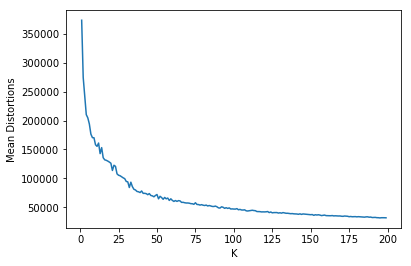

In [330]:
#Find optimal k for whole imgs dataset
#seperate imgs and labels
x_imgs = df.iloc[:,0:720]

#Find optimal k
K = list(range(1,200))
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_imgs)
    meandistortions.append(sum(np.min(cdist(x_imgs, kmeans.cluster_centers_, 'euclidean'), axis=1)) / x_imgs.shape[0])

plt.plot(range(1,200),meandistortions)
plt.xlabel('K')
plt.ylabel('Mean Distortions')

plt.show()

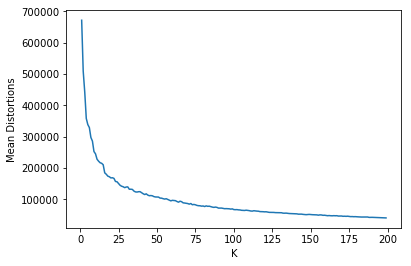

In [41]:
#Find optimal k for good imgs dataset, which label = 1
#seperate imgs and labels
df_good = df[df.iloc[:,720] == 1]
x_imgs_good = df_good.iloc[:,0:720]

#Find optimal k
K = list(range(1,200))
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_imgs_good)
    meandistortions.append(sum(np.min(cdist(x_imgs_good, kmeans.cluster_centers_, 'euclidean'), axis=1)) / x_imgs_good.shape[0])

plt.plot(range(1,200),meandistortions)
plt.xlabel('K')
plt.ylabel('Mean Distortions')

plt.show()

In [333]:
#Try to predict a image
kmeans = KMeans(n_clusters=25, random_state=0).fit(x_imgs)
kmeans.predict([x_imgs.loc[13]])

array([6], dtype=int32)

In [334]:
#Try to predict each image and add the result to the dataframe
kmeans_list = []
kmeans = KMeans(n_clusters=25, random_state=0).fit(x_imgs)

for i in list(range(0,4546)):
    k = kmeans.predict([x_imgs.loc[i]])
    kmeans_list.append(k)

df_kmeans = pd.concat([ pd.DataFrame(x_imgs), pd.DataFrame(kmeans_list)], axis=1)
df_kmeans.head()

,0,1,2,3,4,5,6,7,8,9,...,711,712,713,714,715,716,717,718,719,0
0,0.0,0.0,0.0,0.0,142.0,370.0,358.0,188.0,106.0,120.0,...,466.0,684.0,882.0,620.0,384.0,164.0,96.0,88.0,0.0,0
1,0.0,52.0,234.0,268.0,276.0,230.0,312.0,228.0,106.0,0.0,...,566.0,756.0,678.0,530.0,388.0,242.0,170.0,16.0,14.0,0
2,0.0,0.0,132.0,414.0,842.0,722.0,562.0,170.0,102.0,0.0,...,528.0,752.0,868.0,656.0,334.0,0.0,0.0,0.0,38.0,0
3,0.0,0.0,40.0,318.0,672.0,1274.0,1374.0,1438.0,1274.0,1012.0,...,304.0,452.0,774.0,988.0,932.0,534.0,230.0,96.0,60.0,0
4,0.0,0.0,0.0,62.0,90.0,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [335]:
#Use PCA to reduce dimension
pca=PCA(n_components =0.9, whiten=True)
kmeans_reduced = pca.fit_transform(df_kmeans.iloc[:,0:719])
kmeans_reduced

array([[-0.15918402, -0.07643234, -0.00327108],
       [-0.16200454, -0.07503813, -0.00451529],
       [-0.15745939, -0.07155321, -0.00632853],
       ..., 
       [-0.15844242, -0.08117123, -0.00175521],
       [-0.16065144, -0.06703164,  0.0031814 ],
       [-0.1669565 , -0.07362969,  0.00368911]])

In [336]:
#Create a new dataframe after PCA and Kmeans
df_kmeans_reduced = pd.DataFrame(kmeans_reduced)
df_kmeans_list = pd.DataFrame(kmeans_list)

df_kmeans_reduced = pd.concat([df_kmeans_reduced, df_kmeans_list], axis=1)
df_kmeans_reduced.columns = ['PCA1','PCA2','PCA3','KMeans']
df_kmeans_reduced.head()

,PCA1,PCA2,PCA3,KMeans
0,-0.159184,-0.076432,-0.003271,0
1,-0.162005,-0.075038,-0.004515,0
2,-0.157459,-0.071553,-0.006329,0
3,-0.150581,-0.098639,0.013357,0
4,-0.153991,-0.057582,-0.009552,0


In [337]:
#Set up the fig
my_dpi=96
plt.figure(figsize=(960/my_dpi, 960/my_dpi), dpi=my_dpi)
df_kmeans_reduced['KMeans']=pd.Categorical(df_kmeans_reduced['KMeans'])
my_color=df_kmeans_reduced['KMeans'].cat.codes
df_kmeans_reduced = df_kmeans_reduced.drop('KMeans', 1)

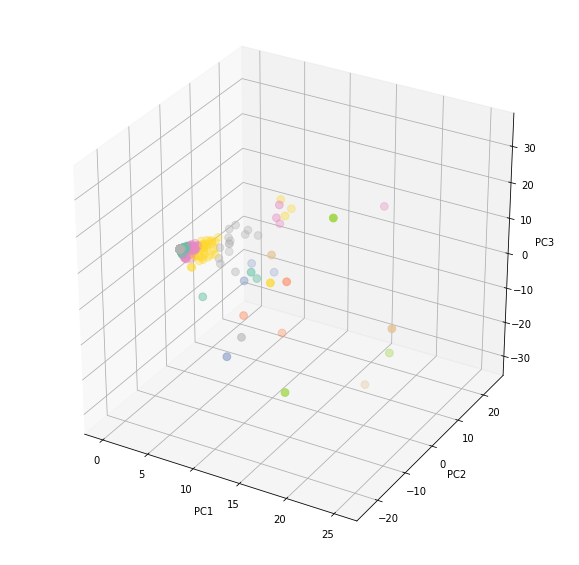

In [349]:
#Plot the 3-D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_kmeans_reduced['PCA1'], df_kmeans_reduced['PCA2'], df_kmeans_reduced['PCA3'], c=my_color, cmap="Set2_r", s=60)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


In [345]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,711,712,713,714,715,716,717,718,719,0
0,0.0,0.0,0.0,0.0,142.0,370.0,358.0,188.0,106.0,120.0,...,466.0,684.0,882.0,620.0,384.0,164.0,96.0,88.0,0.0,0.0
1,0.0,52.0,234.0,268.0,276.0,230.0,312.0,228.0,106.0,0.0,...,566.0,756.0,678.0,530.0,388.0,242.0,170.0,16.0,14.0,0.0
2,0.0,0.0,132.0,414.0,842.0,722.0,562.0,170.0,102.0,0.0,...,528.0,752.0,868.0,656.0,334.0,0.0,0.0,0.0,38.0,0.0
3,0.0,0.0,40.0,318.0,672.0,1274.0,1374.0,1438.0,1274.0,1012.0,...,304.0,452.0,774.0,988.0,932.0,534.0,230.0,96.0,60.0,0.0
4,0.0,0.0,0.0,62.0,90.0,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
#Build DNN
#Split test set and train set
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#Parameter definitions
batch_size = 100
learning_rate = 0.005
max_steps = 1000

#Split dataset into train set and test set
X = df.iloc[:,0:720]
y = df.iloc[:,720]
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size = 0.33, random_state = 1992)

In [231]:
X_train_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,710,711,712,713,714,715,716,717,718,719
3966,1324.0,1284.0,1118.0,984.0,878.0,504.0,406.0,684.0,1082.0,1330.0,...,422.0,754.0,832.0,1142.0,958.0,1102.0,988.0,888.0,674.0,456.0
2749,260.0,190.0,202.0,132.0,260.0,386.0,452.0,350.0,360.0,620.0,...,742.0,732.0,834.0,758.0,874.0,734.0,572.0,426.0,446.0,464.0
2530,498.0,692.0,330.0,296.0,184.0,344.0,422.0,474.0,348.0,308.0,...,336.0,376.0,592.0,962.0,948.0,686.0,360.0,252.0,338.0,284.0
3065,392.0,386.0,144.0,120.0,78.0,98.0,80.0,70.0,22.0,64.0,...,138.0,94.0,176.0,296.0,320.0,212.0,142.0,98.0,154.0,316.0
1066,0.0,0.0,98.0,168.0,240.0,126.0,64.0,38.0,80.0,62.0,...,172.0,276.0,460.0,316.0,324.0,246.0,264.0,128.0,48.0,0.0


In [321]:
y_train_raw.head()

3966    1.0
2749    0.0
2530    1.0
3065    0.0
1066    1.0
Name: 0, dtype: float32

In [322]:
#Transfer dataframe to array and create a better shape
X_train = np.array(X_train_raw)

X_test = np.array(X_test_raw)

y_train = np.array(y_train_raw)

y_test = np.array(y_test_raw)

In [323]:
y_train

array([ 1.,  0.,  1., ...,  0.,  1.,  0.], dtype=float32)

In [307]:
#Define input placeholders
images_placeholder = tf.placeholder(tf.float32, shape = [None,720])
labels_placeholder = tf.placeholder(tf.int64, shape=[None])

In [308]:
#Define variables which are the values we want to optimize
weights = tf.Variable(tf.zeros([720, 2]))
biases = tf.Variable(tf.zeros([2]))

In [309]:
#Define the classifier's result
logits = tf.matmul(images_placeholder, weights) + biases

In [310]:
#Define the loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = labels_placeholder))


In [311]:
#Define the training operation
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [312]:
#Operation comparing prediction with true label
correct_prediction = tf.equal(tf.argmax(logits, 1), labels_placeholder)

# Operation calculating the accuracy of our predictions
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [320]:
#Run the TensorFlow graph
with tf.Session() as sess:
  #Initialize variables
  sess.run(tf.initialize_all_variables())

  #Repeat max_steps times
  for i in range(max_steps):
        #Generate input data batch
        indices = np.random.choice(X_train.shape[0], batch_size)
        images_batch = X_train[indices]
        labels_batch = y_train[indices]
        #Periodically print out the model's current accuracy
        if i % 100 == 0:
            train_accuracy = sess.run(accuracy, feed_dict={images_placeholder: images_batch,
                                                           labels_placeholder: labels_batch})
            print('Step {:5d}: training accuracy {:g}'.format(i, train_accuracy))
            #Perform a single training step
            sess.run(train_step, feed_dict={images_placeholder: images_batch,labels_placeholder: labels_batch})
            test_accuracy = sess.run(accuracy, feed_dict={images_placeholder: X_test,labels_placeholder: y_test})
            print('Test accuracy {:g}'.format(test_accuracy))
            print()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step     0: training accuracy 0.75
Test accuracy 0.311792

Step   100: training accuracy 0.33
Test accuracy 0.688208

Step   200: training accuracy 0.75
Test accuracy 0.688208

Step   300: training accuracy 0.63
Test accuracy 0.311792

Step   400: training accuracy 0.28
Test accuracy 0.389074

Step   500: training accuracy 0.35
Test accuracy 0.706862

Step   600: training accuracy 0.73
Test accuracy 0.62958

Step   700: training accuracy 0.61
Test accuracy 0.657562

Step   800: training accuracy 0.66
Test accuracy 0.658228

Step   900: training accuracy 0.71
Test accuracy 0.690207

